In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('supply_chain_data.csv')

In [2]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [3]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


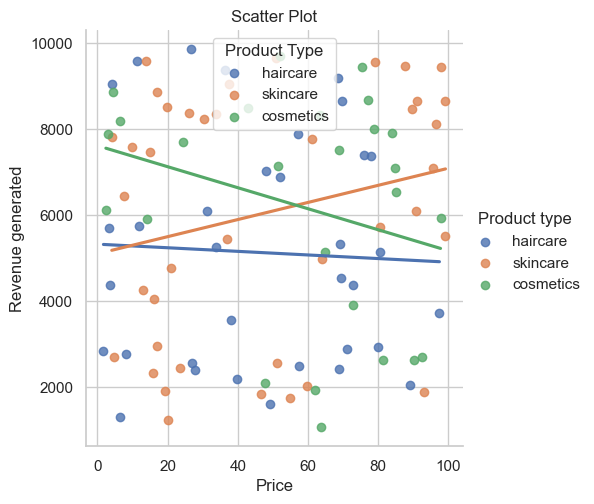

In [4]:
sns.set(style="whitegrid")
scatter = sns.lmplot(x='Price', y='Revenue generated', data=data, hue='Product type',
                      ci=None)

# Add a legend
plt.legend(title='Product Type')

# Set axis labels and plot title
plt.xlabel('Price')
plt.ylabel('Revenue generated')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [5]:
data['Product type'].unique()

array(['haircare', 'skincare', 'cosmetics'], dtype=object)

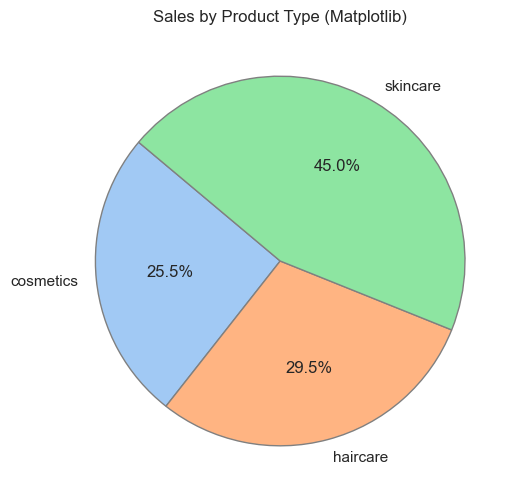

In [6]:
df = pd.DataFrame(data)

# Group the data by 'Product type' and sum the 'Number of products sold'
sales_data = df.groupby('Product type')['Number of products sold'].sum().reset_index()

# Create a pie chart using Matplotlib
plt.figure(figsize=(6, 6))
colors = sns.color_palette('pastel', len(sales_data['Product type']))
plt.pie(sales_data['Number of products sold'], labels=sales_data['Product type'], autopct='%1.1f%%', startangle=140,
        colors=colors, wedgeprops={'edgecolor': 'gray'})
plt.title('Sales by Product Type (Matplotlib)')

# Show the Matplotlib pie chart
plt.show()

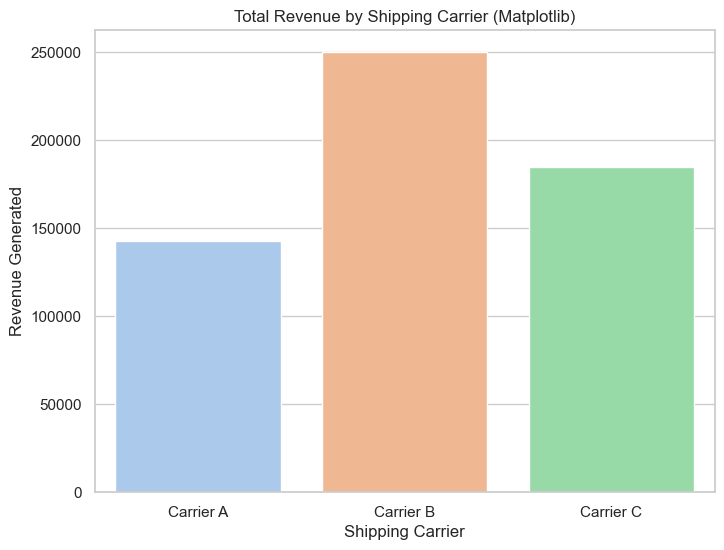

In [7]:
total_revenue = df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
sns.barplot(x='Shipping carriers', y='Revenue generated', data=total_revenue, palette='pastel')
plt.title('Total Revenue by Shipping Carrier (Matplotlib)')
plt.xlabel('Shipping Carrier')
plt.ylabel('Revenue Generated')

# Show the Matplotlib bar chart
plt.show()

In [8]:
avg_lead_time = df.groupby('Product type')['Lead time'].mean().reset_index()

# Calculate the average manufacturing costs for each product type and reset the index
avg_manufacturing_costs = df.groupby('Product type')['Manufacturing costs'].mean().reset_index()

# Merge the two DataFrames on 'Product type' to combine the results
result = pd.merge(avg_lead_time, avg_manufacturing_costs, on='Product type')

# Rename columns for clarity
result.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)

# Print the result
print(result)

  Product type  Average Lead Time  Average Manufacturing Costs
0    cosmetics          13.538462                    43.052740
1     haircare          18.705882                    48.457993
2     skincare          18.000000                    48.993157


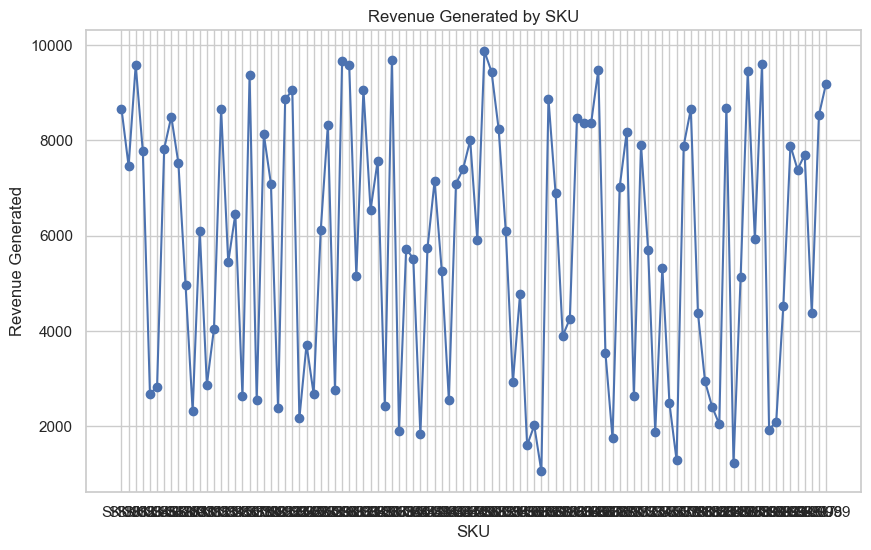

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df['SKU'], df['Revenue generated'], marker='o', linestyle='-', color='b')
plt.title('Revenue Generated by SKU')
plt.xlabel('SKU')
plt.ylabel('Revenue Generated')
plt.grid(True)

# Show the Matplotlib line chart
plt.show()

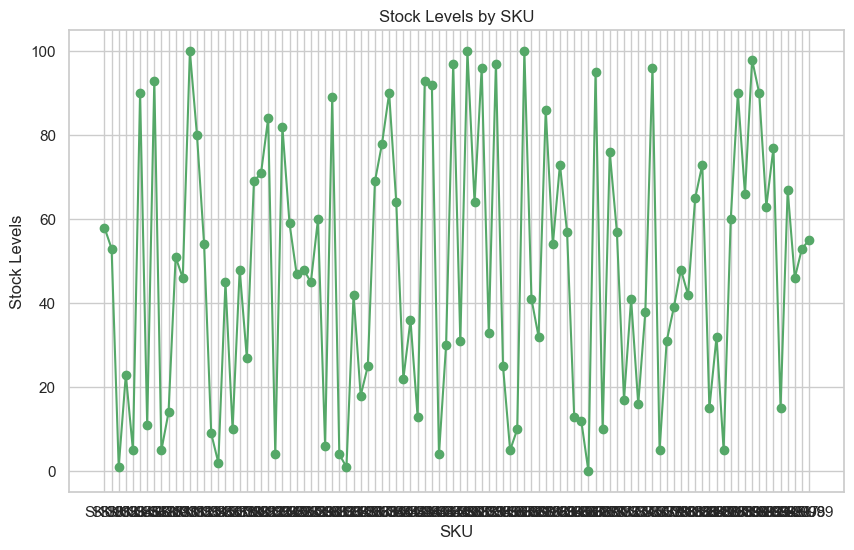

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df['SKU'], df['Stock levels'], marker='o', linestyle='-', color='g')
plt.title('Stock Levels by SKU')
plt.xlabel('SKU')
plt.ylabel('Stock Levels')
plt.grid(True)

# Show the Matplotlib line chart
plt.show()


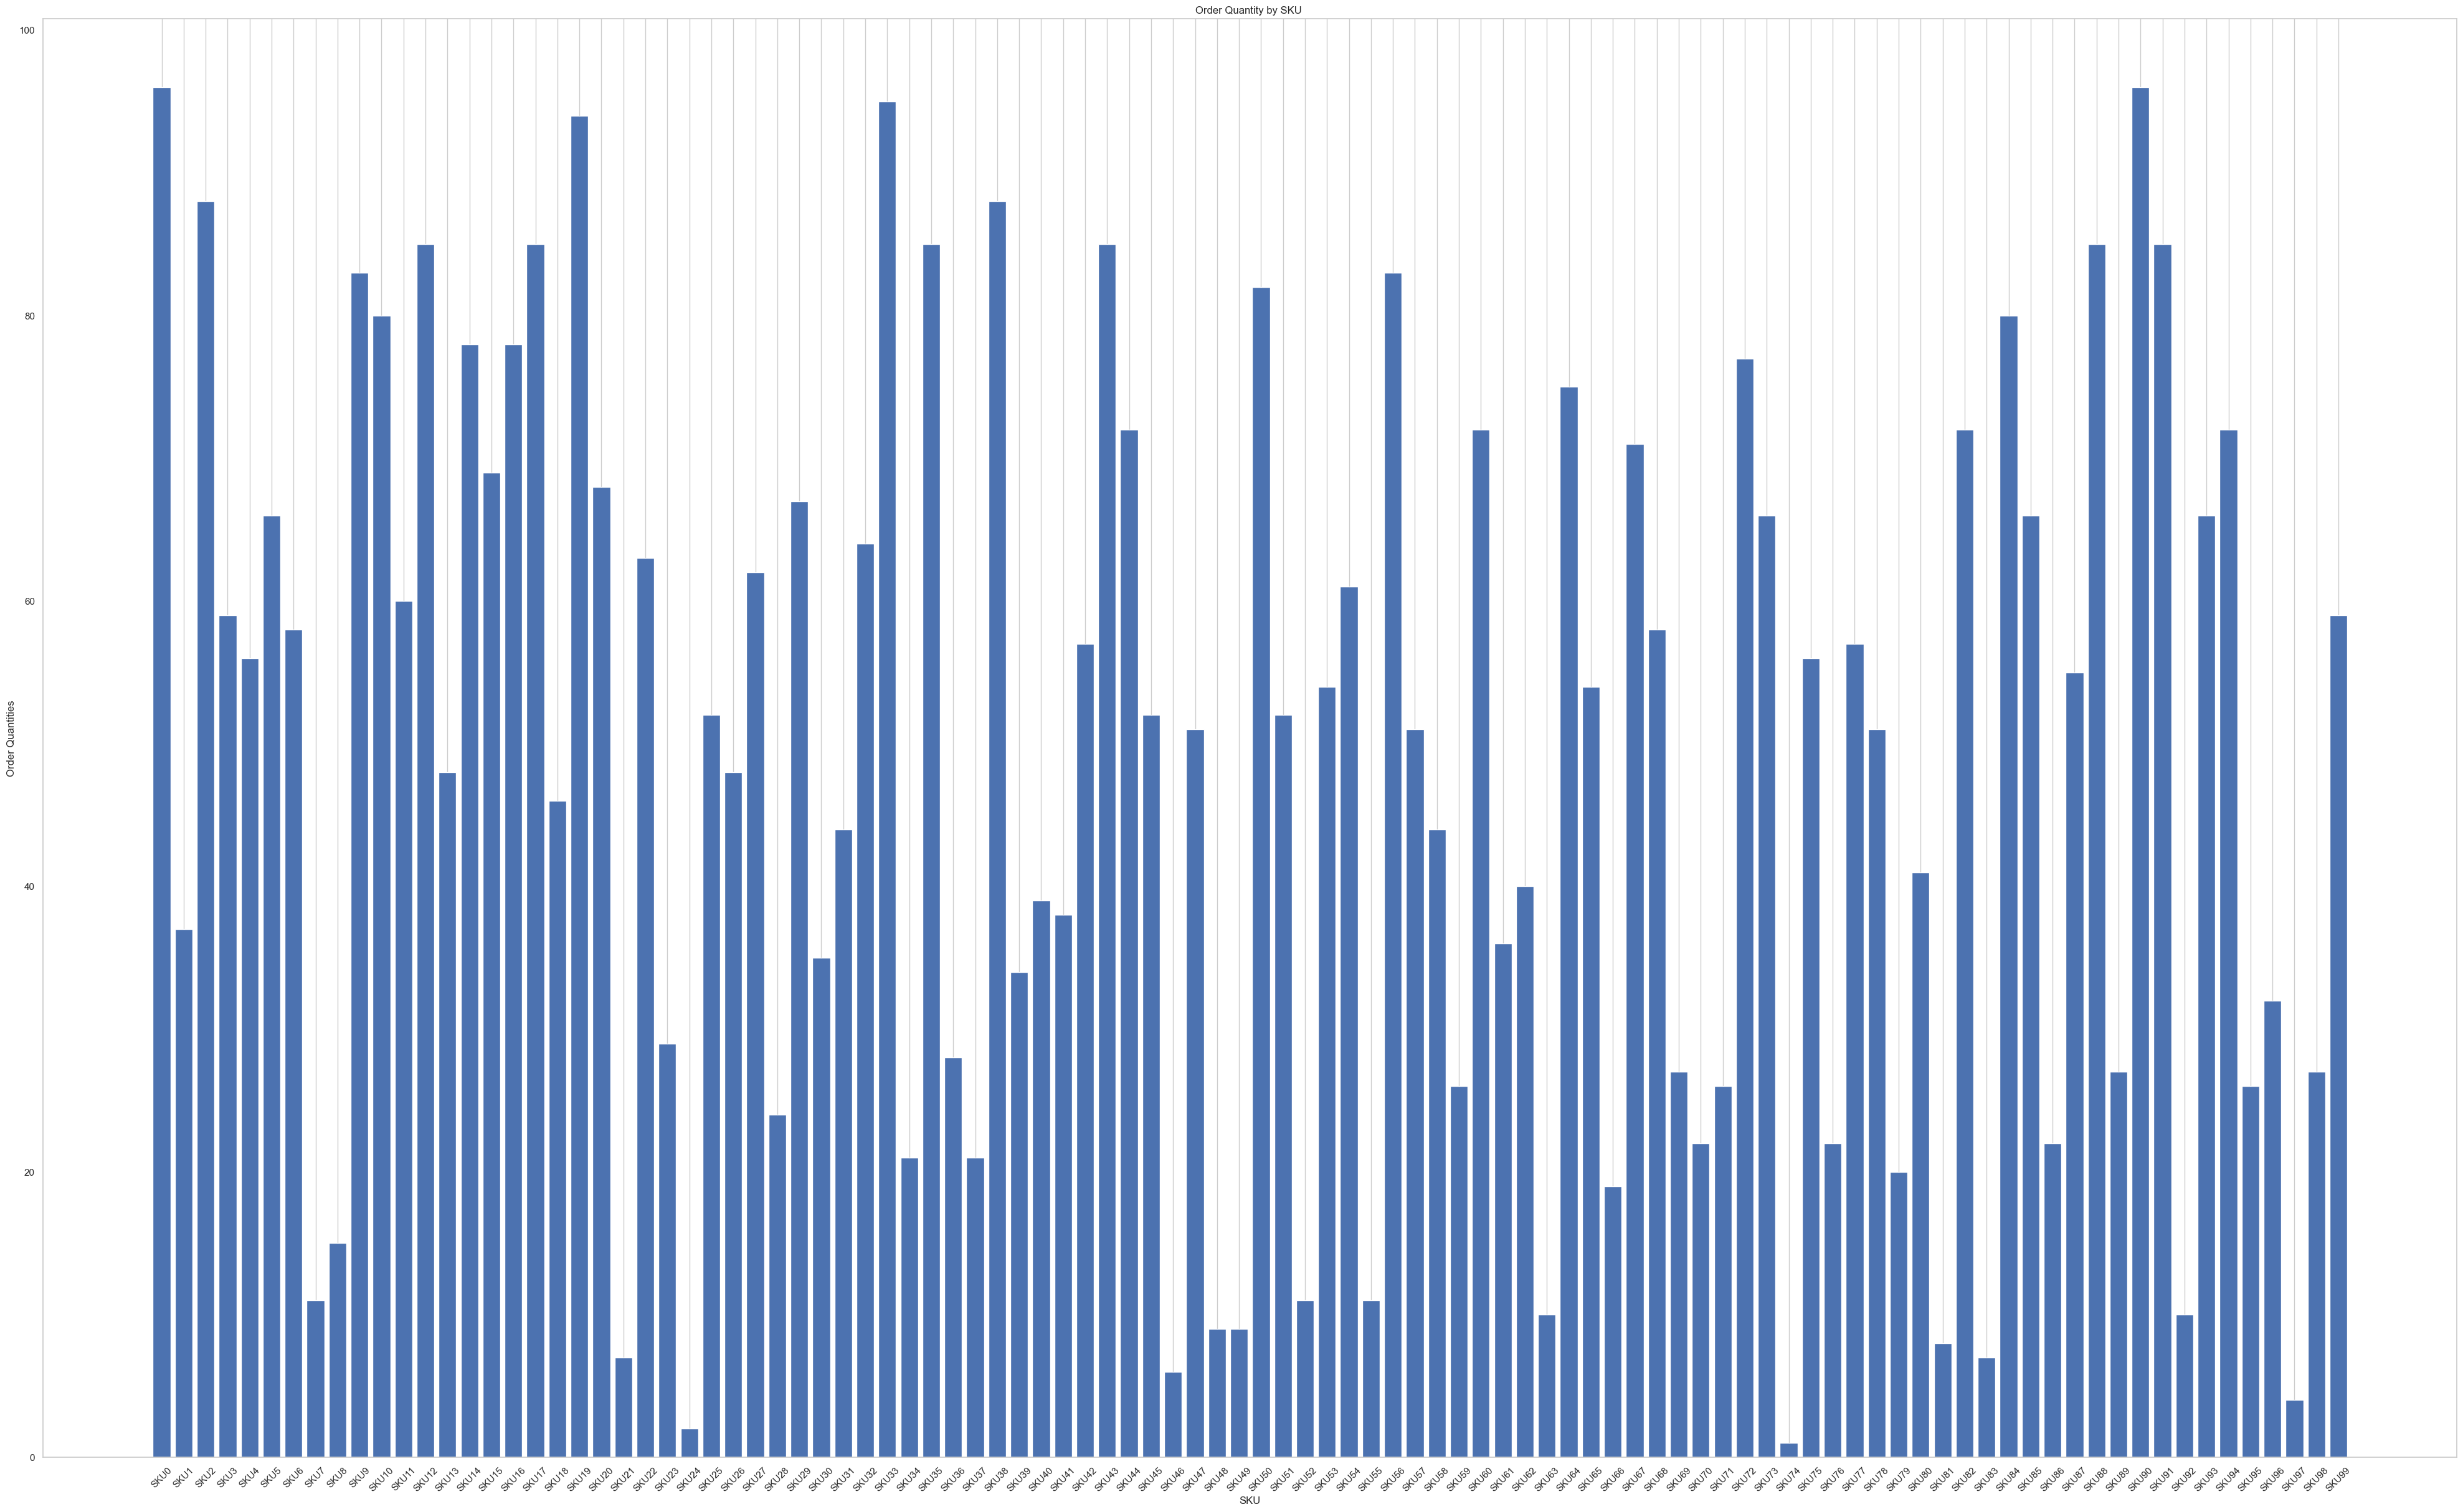

In [11]:
# Create a bar chart using Matplotlib
plt.figure(figsize=(50, 30))
plt.bar(df['SKU'], df['Order quantities'], color='b')
plt.title('Order Quantity by SKU ')
plt.xlabel('SKU')
plt.ylabel('Order Quantities')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the Matplotlib bar chart
plt.show()

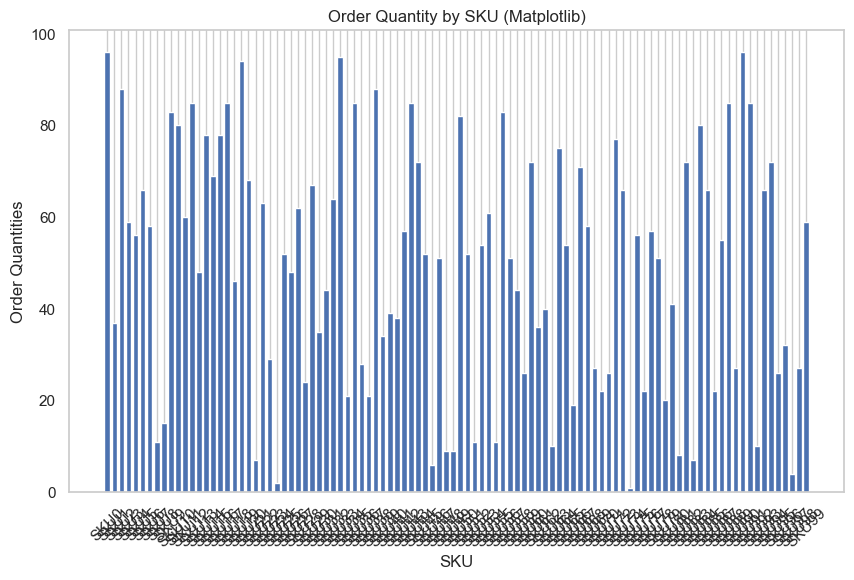

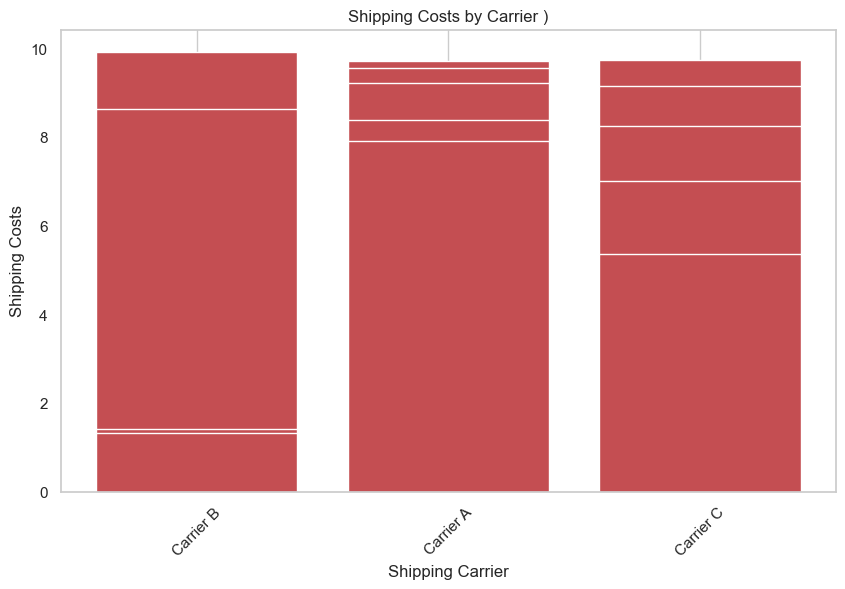

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(df['Shipping carriers'], df['Shipping costs'], color='r')
plt.title('Shipping Costs by Carrier )')
plt.xlabel('Shipping Carrier')
plt.ylabel('Shipping Costs')
plt.xticks(rotation=45)
plt.grid(axis='y')


plt.show()

In [13]:
df['Shipping costs'].max()

9.92981624527726

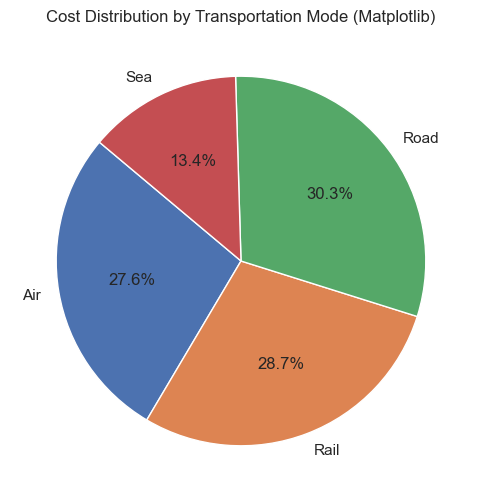

In [14]:
# Calculate the total costs for each transportation mode
total_costs = df.groupby('Transportation modes')['Costs'].sum().reset_index()

# Create a pie chart using Matplotlib
plt.figure(figsize=(6, 6))
plt.pie(total_costs['Costs'], labels=total_costs['Transportation modes'], autopct='%1.1f%%', startangle=140)
plt.title('Cost Distribution by Transportation Mode (Matplotlib)')

# Show the Matplotlib pie chart
plt.show()

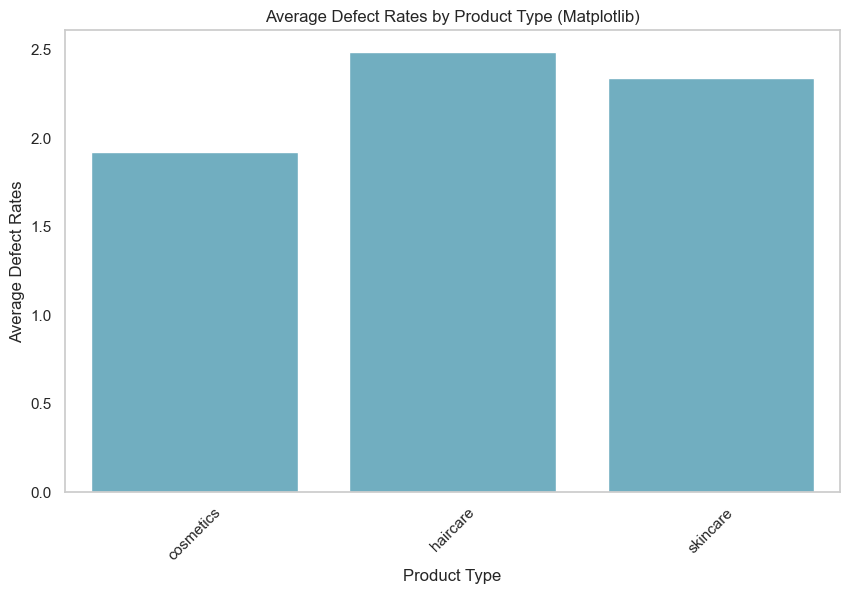

In [15]:

# Calculate the average defect rates for each product type and reset the index
defect_rates_by_product = df.groupby('Product type')['Defect rates'].mean().reset_index()

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(data=defect_rates_by_product, x='Product type', y='Defect rates', color='c')
plt.title('Average Defect Rates by Product Type (Matplotlib)')
plt.xlabel('Product Type')
plt.ylabel('Average Defect Rates')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the Matplotlib bar chart
plt.show()

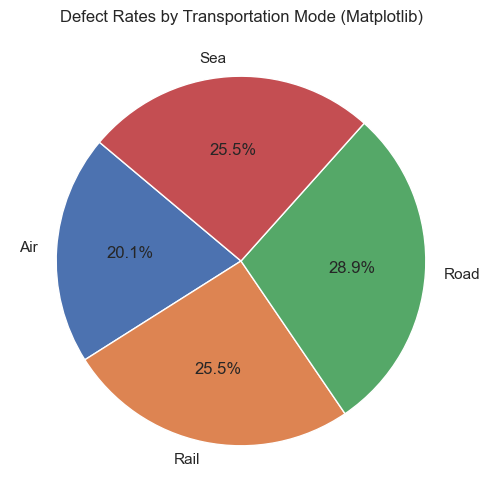

In [16]:
# Create a pivot table to calculate the mean defect rates by transportation mode
pivot_table = pd.pivot_table(df, values='Defect rates', index=['Transportation modes'], aggfunc='mean')

# Create a pie chart using Matplotlib
plt.figure(figsize=(6, 6))
plt.pie(pivot_table['Defect rates'], labels=pivot_table.index, autopct='%1.1f%%', startangle=140)
plt.title('Defect Rates by Transportation Mode (Matplotlib)')

# Show the Matplotlib pie chart
plt.show()

In [17]:
!pip install statsmodels

In [25]:

# 1. Calculate total sales for each product
product_sales = df.groupby('Product type')['Number of products sold'].sum().reset_index()
product_sales = product_sales.rename(columns={'Number of products sold': 'Total_Sales'})

# 2. Calculate profit margins for each product
# Assuming you have a 'Costs' column representing the cost of each product
# You can calculate profit as (Revenue generated - Costs) / Revenue generated
df['Profit'] = (df['Revenue generated'] - df['Costs']) / df['Revenue generated']
product_profit_margin = df.groupby('Product type')['Profit'].mean().reset_index()
product_profit_margin = product_profit_margin.rename(columns={'Profit': 'Avg_Profit_Margin'})



# Merge the analysis results into a single DataFrame
product_analysis = pd.merge(product_sales, product_profit_margin, on='Product type')


# Display the product performance analysis
print(product_analysis)


  Product type  Total_Sales  Avg_Profit_Margin
0    cosmetics        11757           0.882422
1     haircare        13611           0.868444
2     skincare        20731           0.874350
